#Setup Chromium Driver

In [2]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [890 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/mai

#Setup Google Drive File System

In [1]:
import pandas as pd
import sys
import os

from google.colab import drive
drive.mount('/content/gdrive/')
sys.path.append('/content/gdrive/My Drive/lead_gen')
%cd /content/gdrive/My\ Drive/lead_gen

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/
/content/gdrive/My Drive/lead_gen


In [50]:
excel_data = pd.read_excel('send_or_not.xlsx', sheet_name='13k')
excel_data.rename(columns={'SEND/NOT SEND':'send'}, inplace=True)
data_i = excel_data[excel_data['send'].apply(lambda x: x in ['SEND', 'NOT SEND'])]

In [51]:
data_i.shape

(1743, 50)

#Website ranking

###Read only unique websites

In [52]:
data_i['website'].duplicated().sum()

817

In [53]:
w_test = pd.DataFrame(data_i['website'].dropna().str.replace(" ","").str.lower().unique(), columns = ['web'])

In [54]:
w_test.head()

,web
0,www.filtronicssystems.com.mx
1,www.clinicaarce.com.mx
2,http://cronosmonterrey.com/
3,www.avanceempresarial.com
4,www.viajesrangel.com.mx


Check the size of unique websites

In [8]:
w_test.shape

(925, 1)

###Running the classification script

Importing Classification Script

In [9]:
import wc
wc.dict1={}

In [10]:
#need to optimize
i=0
for websites in w_test['web']:
  wc.driver = wc.webdriver.Chrome('chromedriver',options=wc.chrome_options)
  wc.main_func(str(websites))
  i=i+1
  print("Current session is {} - {} - {} - {}".format(wc.driver.session_id, i, str(websites), wc.dict1[str(websites)]))
  wc.driver.close()

Current session is 46d4cf622788975b02086e3b7d71a701 - 1 - WWW.FILTRONICSSYSTEMS.COM.MX - Website Down
Current session is 9955f6f02bacf5aa4467200bc3b9b36f - 2 - WWW.CLINICAARCE.COM.MX - Bad
Current session is e6ca82d1cca452cb569e3d58556c7ca4 - 3 - http://cronosmonterrey.com/ - Website Down
Current session is 14a114316e287331d82d3c87a697cc74 - 4 - WWW.AVANCEEMPRESARIAL.COM - Website Down
Current session is dbf404e80d3018b6f0184dd519dc9076 - 5 - WWW.VIAJESRANGEL.COM.MX - Website Down
Current session is 7fa075e53ff740bbe9029169b8d483ac - 6 - WWW.EENAV.COM - Good
Current session is 41480b00ef4f96fb26a01175c8cd8107 - 7 - WWW.FYPEXHERRAMENTAL.COM - Good
Current session is 338019501940c266d6a62732161099f7 - 8 - http://zona572.com/~agripro/ - Good
Current session is 551325d425f68ec45c572b59f65c8658 - 9 - WWW.GLOBEI.COM.MX - Good
Current session is 96895eacd87467474258e011bfe7cf1f - 10 - http://www.gdtrailers.com/ - Good
Current session is 1aafc605aa143477fad59434854edcd6 - 11 - https://despacho

KeyError: ignored

In [ ]:
wc.driver.quit()

In [11]:
backup = wc.dict1

#Preprocessing

###Label null website as "No Website" and create a column for ranking

In [12]:
import numpy as np
data_i['website'].fillna("No Website", inplace = True)
data_i['wresult'] = np.nan
data_f = data_i.copy()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Assign ranking value from classifiction result dictionary

In [13]:
#need to optimize
for key, value in wc.dict1.items():
  for website in data_f['website']:
    if website == "No Website":
      data_f['wresult'].loc[data_f['website']==website] = "Website not available"
    elif website == key:
      data_f['wresult'].loc[data_f['website']==website] = wc.dict1[website]
      
# status = pd.DataFrame(list(wc.dict1.items()),columns = ['website','status'])
# status.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Drop all rows having unlabled website

In [14]:
data_final = data_f[['no_of_employees','wresult', 'send']].dropna()

Final unincoded data

In [15]:
data_final.shape

(1440, 3)

In [16]:
data_final.sample(10)

,no_of_employees,wresult,send
8675,0 a 5 personas,Website not available,NOT SEND
40,6 a 10 personas,Good,SEND
2579,6 a 10 personas,Good,NOT SEND
405,6 a 10 personas,Website Down,SEND
44,6 a 10 personas,Website not available,SEND
39,6 a 10 personas,Good,SEND
321,0 a 5 personas,Bad,NOT SEND
9627,0 a 5 personas,Website not available,NOT SEND
441,6 a 10 personas,Bad,SEND
1458,6 a 10 personas,Website Down,NOT SEND


###Encoding features

In [17]:
#Website available or not (label encoding)
#data['wresult'] = (data_final['wresult'] != "Website not available").astype('category').cat.codes4

#Label
# data = pd.DataFrame([data_final[x].astype('category').cat.codes for x in ['no_of_employees', 'wresult', 'send']])
# data = data.T
# data.columns = ['emp size', 'wresult', 'send']

#one hot
# data = pd.get_dummies(data_final[['no_of_employees', 'wresult']])
# data['send'] = data_final['send'].astype('category').cat.codes

#replace
data = data_final.copy()
rep = {"no_of_employees": {"6 a 10 personas": 8, "0 a 5 personas": 3},
                 "send": {"SEND": 1, "NOT SEND": 0},
                 "wresult": {"Good": 3, "Bad": 2, "Website Down": 1, "Website not available": 0}
                 }
data.replace(rep, inplace=True)

data.sample(3)

,no_of_employees,wresult,send
636,3,0,1
1655,8,1,1
315,3,0,1


Split feature and label set

In [18]:
X = data.values[:, :-1].astype(float)
y = data.values[:, -1].astype(float)

Train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

Check the size of train test

In [20]:
(X_train.shape, X_test.shape)

((1008, 2), (432, 2))

###Train the model

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Predict from test set

In [22]:
y_pred=logreg.predict(X_test)

Inverse Encoding

In [23]:
class0 = data_final['send'].astype('category').cat.categories[0]
class1 = data_final['send'].astype('category').cat.categories[1]
labels = [class0, class1]

###Metrices

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


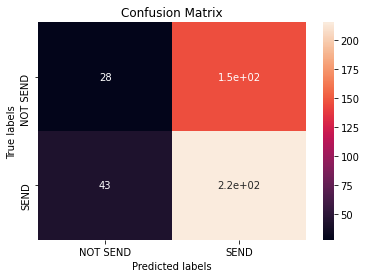

In [24]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt     
cm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5625
Precision: 0.5955678670360111
Recall: 0.8333333333333334


ROC Curve

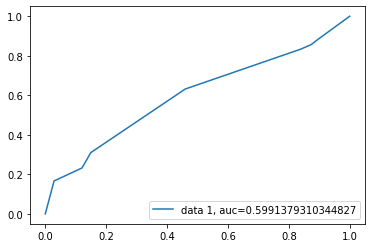

In [26]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Decision Tree Classifier

In [27]:
data = pd.get_dummies(data_final[['no_of_employees', 'wresult']])
data['send'] = data_final['send'].astype('category').cat.codes

In [28]:
data.sample()

,no_of_employees_0 a 5 personas,no_of_employees_6 a 10 personas,wresult_Bad,wresult_Good,wresult_Website Down,wresult_Website not available,send
299,1,0,0,1,0,0,1


In [29]:
X = data.values[:, :-1].astype(float)
y = data.values[:, -1].astype(float)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6493055555555556


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


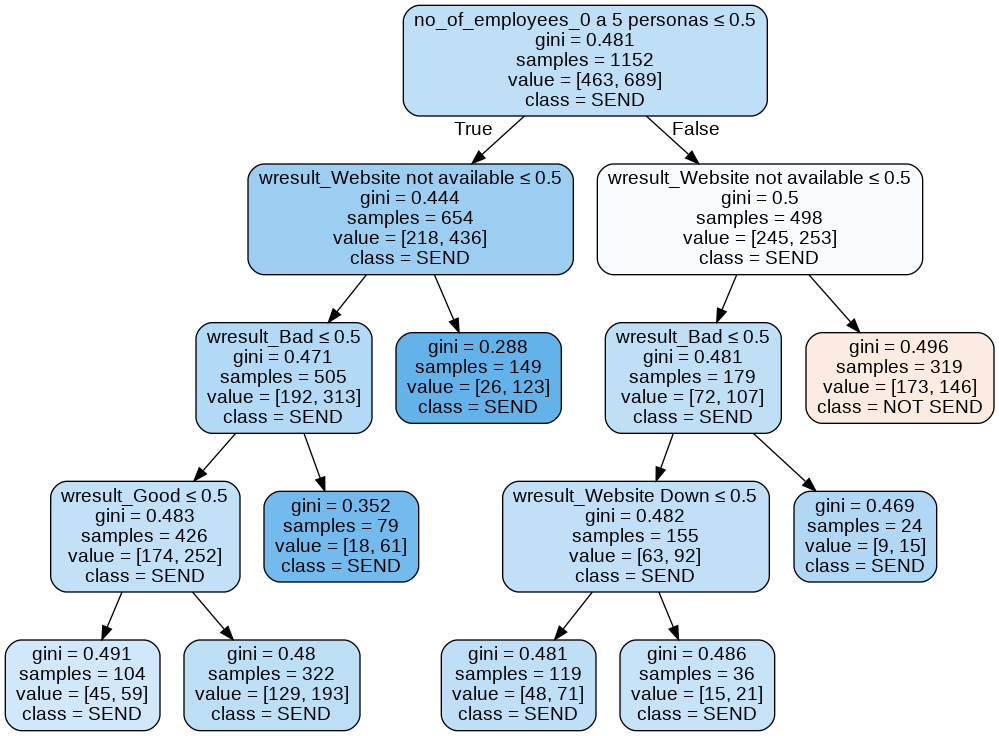

In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[:-1],class_names=labels)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('send_not_send.png')
Image(graph.create_png())